In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_weather = pd.read_csv('data/weather.csv')         #import in weather dataset
raw_weather.head()                                    

station_nbr        date tmax tmin tavg depart dewpoint wetbulb heat cool  \
0            1  2012-01-01   52   31   42      M       36      40   23    0   
1            2  2012-01-01   48   33   41     16       37      39   24    0   
2            3  2012-01-01   55   34   45      9       24      36   20    0   
3            4  2012-01-01   63   47   55      4       28      43   10    0   
4            6  2012-01-01   63   34   49      0       31      43   16    0   

  sunrise sunset     codesum snowfall preciptotal stnpressure sealevel  \
0       -      -  RA FZFG BR        M        0.05       29.78    29.92   
1    0716   1626          RA      0.0        0.07       28.82    29.91   
2    0735   1720                  0.0        0.00       29.77    30.47   
3    0728   1742                  0.0        0.00       29.79    30.48   
4    0727   1742                  0.0        0.00       29.95    30.47   

  resultspeed resultdir avgspeed  
0         3.6        20      4.6  
1         9.1        23     11.3  
2         9.9        31     10.0  
3         8.0        35      8.2  
4        14.0        36     13.8

In [3]:
weather_df = raw_weather[['station_nbr','date','tavg','preciptotal']]   #extract only temp and precip data for each station
weather_df.sort_values(by=['station_nbr', 'date'])     

station_nbr        date tavg preciptotal
0                1  2012-01-01   42        0.05
19               1  2012-01-02   41        0.01
38               1  2012-01-03   22        0.00
57               1  2012-01-04   19        0.00
76               1  2012-01-05   32        0.00
95               1  2012-01-06   36           T
114              1  2012-01-07   43        0.00
133              1  2012-01-08   36        0.00
152              1  2012-01-09   31        0.00
171              1  2012-01-10   38           T
190              1  2012-01-11   32        0.00
209              1  2012-01-12   36        0.69
228              1  2012-01-13   40        0.02
247              1  2012-01-14   25        0.00
266              1  2012-01-15   10        0.00
285              1  2012-01-16   20        0.05
304              1  2012-01-17   39        0.09
323              1  2012-01-18   35           T
342              1  2012-01-19   22        0.02
361              1  2012-01-20   25        0.08
380              1  2012-01-21   17        0.12
399              1  2012-01-22   18           T
418              1  2012-01-23   38        0.12
437              1  2012-01-24   48           T
456              1  2012-01-25   39        0.00
475              1  2012-01-26   38        0.15
494              1  2012-01-27   40        1.14
513              1  2012-01-28   40        0.00
532              1  2012-01-29   37        0.00
551              1  2012-01-30   32           T
...            ...         ...  ...         ...
19936           20  2014-10-02   80        0.47
19956           20  2014-10-03   71        0.00
19976           20  2014-10-04   64        0.00
19996           20  2014-10-05   74        0.00
20016           20  2014-10-06   76        0.16
20036           20  2014-10-07   84        0.00
20056           20  2014-10-08   83        0.00
20076           20  2014-10-09   85        0.00
20096           20  2014-10-10   80        0.55
20116           20  2014-10-11   60        0.42
20136           20  2014-10-12   64           T
20156           20  2014-10-13   69        1.36
20176           20  2014-10-14   67        0.00
20196           20  2014-10-15   67        0.00
20216           20  2014-10-16   74        0.00
20236           20  2014-10-17   75        0.00
20256           20  2014-10-18   75        0.00
20276           20  2014-10-19   68        0.00
20296           20  2014-10-20   70        0.00
20316           20  2014-10-21   69        0.00
20336           20  2014-10-22   71        0.00
20356           20  2014-10-23   72           T
20376           20  2014-10-24   73        0.00
20396           20  2014-10-25   77        0.00
20416           20  2014-10-26   79        0.00
20436           20  2014-10-27   76        0.00
20456           20  2014-10-28   74        0.00
20476           20  2014-10-29   67        0.00
20496           20  2014-10-30   66        0.00
20516           20  2014-10-31   59        0.00

[20517 rows x 4 columns]

In [4]:
stations = {}        #new dictionary consisting of stations as keys, and their respective weather dataframes as values
replacements = {'tavg' : {r'M' : np.nan},
                'preciptotal' : {r'T' : 0.00, r'M' : np.nan}}  #replace all missing values with NaN, precip traces as 0.00
clean_weather = weather_df.replace(replacements, regex=True)
clean_weather.dropna(inplace=True)   #eliminate any rows with missing values
for x in range(1,21):   #there are 20 stations included in the weather data
    stations['s{0}'.format(x)] = clean_weather.loc[weather_df.station_nbr == x]
    stations['s{0}'.format(x)].set_index('date', inplace=True)   #set index as date for each station's dataframe
    stations['s{0}'.format(x)] = stations['s{0}'.format(x)].apply(pd.to_numeric) #change the datatypes to numeric for plotting
stations['s5']

station_nbr  tavg  preciptotal
date                                      
2013-09-01            5    72         2.32
2013-09-02            5    73         0.43
2013-09-03            5    70         0.00
2013-09-04            5    68         0.00
2013-09-05            5    59         0.08
2013-09-06            5    57         0.00
2013-09-07            5    65         0.00
2013-09-08            5    62         0.00
2013-09-09            5    58         0.00
2013-09-10            5    65         0.03
2013-09-11            5    81         0.00
2013-09-12            5    76         0.47
2013-09-13            5    69         0.17
2013-09-14            5    60         0.00
2013-09-15            5    59         0.00
2013-09-16            5    56         0.02
2013-09-17            5    50         0.00
2013-09-18            5    60         0.00
2013-09-19            5    65         0.00
2013-09-20            5    66         0.00
2013-09-21            5    66         0.00
2013-09-22            5    60         0.39
2013-09-23            5    53         0.00
2013-09-24            5    53         0.00
2013-09-25            5    55         0.00
2013-09-26            5    58         0.00
2013-09-27            5    59         0.00
2013-09-28            5    61         0.00
2013-09-29            5    58         0.00
2013-09-30            5    58         0.00

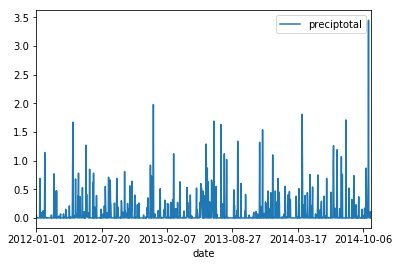

In [5]:
stations['s1'].plot(y='preciptotal')
plt.show()